$$ \frac{d\phi}{dt} = \psi(x,t) \,\, , \quad \frac{d\psi}{dt} = \frac{v^2}{a^2} \left[\phi(x+a,t) + \phi(x-a,t) - 2\phi(x,t) \right]$$
Condiçôes iniciais:
$$ \phi (x) = 0 \,\, , \quad \psi(x) = C \frac{x(L-x)}{L^2} exp\left[ -\frac{(x-d)^2}{2\sigma^2} \right] $$

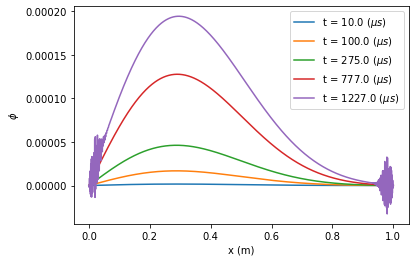

Wall time: 344 ms


In [5]:
%%time
import numpy as np
import matplotlib.pyplot as plt

v = 100     #m/s
L = 1       #m
d = 0.1     #m
C = 1       #m/s
sigma = 0.3 #m

N = 1000    # number of spatial points
a = L / N   # spacing between points
h = 10**-6  #segundos ---> time-step
k = h * v**2 / (a**2)

#Condições inicias
fi0 = 0
def psi0(x):
    return C * x*(L-x) / L**2 * np.exp(-(x-d)**2 / (2*sigma**2))

# para poder representar os gráficos
epsilon = h/10000 
t1 = 10    * h  # multiploco por h, pois cada iteração vai de h em h
t2 = 100   * h  # iteração 100
t3 = 275   * h  # iteração 275
t4 = 777   * h
t5 = 1227  * h
tend = t5 + epsilon


# Create arrays
x = np.linspace(0, L, N+1)
fi = np.zeros(N+1 , float)
psi = np.zeros(N+1 , float)
for i in range(N+1):
    psi[i] = psi0(x[i]) 
fi_Velho = np.copy(fi)
psi_Velho = np.copy(psi)

# Main loop
t = 0.0
while t < tend:
    fi[1:N]  = fi_Velho[1:N]  + h * psi_Velho[1:N] 
    psi[1:N] = psi_Velho[1:N] + k * (fi_Velho[0:N-1] + fi_Velho[2:N+1] - 2*fi_Velho[1 :N])
    fi_Velho = np.copy(fi)
    psi_Velho = np.copy(psi)
    t += h
    
        # Make plots at the given times
    if abs(t-t1)<epsilon:
        plt.plot(x, fi, label= "t = {} ($\mu s$)".format(t1/h))
    elif abs(t-t2)<epsilon:
        plt.plot(x, fi, label= "t = {} ($\mu s$)".format(t2/h))
    elif abs(t-t3)<epsilon:
        plt.plot(x, fi, label= "t = {} ($\mu s$)".format(t3/h))
    elif abs(t-t4)<epsilon:
        plt.plot(x, fi, label= "t = {} ($\mu s$)".format(t4/h))
    elif abs(t-t5)<epsilon:
         plt.plot(x, fi, label= "t = {} ($\mu s$)".format(t5/h))   

plt.xlabel("x (m)")
plt.ylabel("$\phi$ ")
plt.legend()
plt.show()